In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras import optimizers
from keras.layers import Dropout
from keras.regularizers import l2

2023-07-23 14:58:07.534744: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-23 14:58:26.043704: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [7]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print(physical_devices)
if physical_devices:
  tf.config.experimental.set_memory_growth(physical_devices[0], True)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [8]:
df = pd.read_csv("../final_df/final_df_minute-15_period-8_feature-27.csv")
df = df.drop("Unnamed: 0", axis=1)

In [3]:
df

,open,open_change,open_pct_change,high,high_change,high_pct_change,low,low_change,low_pct_change,close,...,vwap,vwap_signal,stochrsi,stochrsi_k,stochrsi_d,stochrsi_signal,macd,macd_s,macd_signal,trend
0,1.10799,0.00011,0.009929,1.10801,-0.00001,-0.000903,1.10779,0.00009,0.008125,1.10789,...,1.107900,-1,0.000000,0.000000,0.000000,0,-0.000009,-0.000002,-1,0
1,1.10789,-0.00010,-0.009025,1.10789,-0.00012,-0.010830,1.10720,-0.00059,-0.053259,1.10760,...,1.107743,-1,0.000000,0.000000,0.000000,0,-0.000039,-0.000009,-1,0
2,1.10759,-0.00030,-0.027079,1.10822,0.00033,0.029786,1.10727,0.00007,0.006322,1.10819,...,1.107783,1,0.000000,0.000000,0.000000,0,-0.000015,-0.000010,-1,0
3,1.10820,0.00061,0.055075,1.11146,0.00324,0.292361,1.10819,0.00092,0.083087,1.11003,...,1.108936,1,0.000000,0.000000,0.000000,0,0.000151,0.000022,1,0
4,1.11004,0.00184,0.166035,1.11066,-0.00080,-0.071977,1.10941,0.00122,0.110089,1.11040,...,1.109553,1,0.912834,0.000000,0.000000,0,0.000309,0.000079,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199994,1.12280,-0.00021,-0.018700,1.12297,-0.00011,-0.009794,1.12258,-0.00021,-0.018703,1.12259,...,1.122903,-1,0.000000,0.000000,0.053814,0,-0.000051,0.000076,-1,0
199995,1.12258,-0.00022,-0.019594,1.12264,-0.00033,-0.029386,1.12243,-0.00015,-0.013362,1.12252,...,1.122712,-1,0.000000,0.000000,0.000000,0,-0.000096,0.000042,-1,0
199996,1.12253,-0.00005,-0.004454,1.12270,0.00006,0.005345,1.12252,0.00009,0.008018,1.12264,...,1.122628,1,0.571279,0.190426,0.063475,1,-0.000121,0.000009,-1,0
199997,1.12263,0.00010,0.008908,1.12274,0.00004,0.003563,1.12253,0.00001,0.000891,1.12256,...,1.122578,-1,0.539857,0.370379,0.186935,0,-0.000145,-0.000022,-1,0


In [9]:
# number of rows to use 
df = df[-10000:]
df.reset_index(inplace=True)
df = df.drop(['index'], axis=1)

In [10]:
scaler = MinMaxScaler()

In [11]:
df[['open', 'open_change', 'open_pct_change', 'high', 'high_change', 'high_pct_change', 'low', 'low_change', 'low_pct_change',
                        'close', 'close_change', 'close_pct_change', 'volume', 'volume_change', 'volume_pct_change', 
                        'ema_100', 'ema_200', 'vwap', 'stochrsi', 'stochrsi_k', 'stochrsi_d',
                        'macd',	'macd_s'
    ]] = scaler.fit_transform(df[['open', 'open_change', 'open_pct_change', 'high', 'high_change', 'high_pct_change', 'low', 'low_change', 'low_pct_change',
                        'close', 'close_change', 'close_pct_change', 'volume', 'volume_change', 'volume_pct_change', 
                        'ema_100', 'ema_200', 'vwap', 'stochrsi', 'stochrsi_k', 'stochrsi_d',
                        'macd',	'macd_s'
    ]])

In [12]:
o0 = []
o1 = []
o2 = []
h0 = []
h1 = []
h2 = []
l0 = []
l1 = []
l2 = []
c0 = []
c1 = []
c2 = []
v0 = []
v1 = []
v2 = []
em1 = []
em2 = []
em_s = []
vw = []
vw_s = []
st = []
stk= []
std = []
st_s = []
ma = []
ms = []
ma_s = []
y = []

In [13]:
for i in range (0, df.shape[0] - 250):
    o0.append(df.iloc[i:i+250, 0])
    o1.append(df.iloc[i:i+250, 1])
    o2.append(df.iloc[i:i+250, 2])
    h0.append(df.iloc[i:i+250, 3])
    h1.append(df.iloc[i:i+250, 4])
    h2.append(df.iloc[i:i+250, 5])
    l0.append(df.iloc[i:i+250, 6])
    l1.append(df.iloc[i:i+250, 7])
    l2.append(df.iloc[i:i+250, 8])
    c0.append(df.iloc[i:i+250, 9])
    c1.append(df.iloc[i:i+250, 10])
    c2.append(df.iloc[i:i+250, 11])
    v0.append(df.iloc[i:i+250, 12])
    v1.append(df.iloc[i:i+250, 13])
    v2.append(df.iloc[i:i+250, 14])


    em1.append(df.iloc[i:i+250, 15])
    em2.append(df.iloc[i:i+250, 16])
    em_s.append(df.iloc[i:i+250, 17])

    vw.append(df.iloc[i:i+250, 18])
    vw_s.append(df.iloc[i:i+250, 19])

    st.append(df.iloc[i:i+250, 20])
    stk.append(df.iloc[i:i+250, 21])
    std.append(df.iloc[i:i+250, 22])
    st_s.append(df.iloc[i:i+250, 23])

    ma.append(df.iloc[i:i+250, 24])
    ms.append(df.iloc[i:i+250, 25])
    ma_s.append(df.iloc[i:i+250, 26])

    y.append(df.iloc[i+250, 27])

In [14]:

o0, o1, o2, h0, h1, h2, l0, l1, l2, c0, c1, c2, v0, v1, v2, em1, em2, em_s, vw, vw_s, st, stk, std, st_s, ma , ms, ma_s, y= np.array(o0), np.array(o1), np.array(o2), np.array(h0), np.array(h1), np.array(h2), np.array(l0), np.array(l1), np.array(l2), np.array(c0), np.array(c1), np.array(c2), np.array(v0), np.array(v1), np.array(v2), np.array(em1), np.array(em2), np.array(em_s), np.array(vw), np.array(vw_s), np.array(st), np.array(stk), np.array(std), np.array(st_s), np.array(ma), np.array(ms), np.array(ma_s), np.array(y)

In [15]:
y = np.reshape(y, (len(y), 1))
y.shape

(9750, 1)

In [16]:
X = np.stack([o0, o1, o2, h0, h1, h2, l0, l1, l2, c0, c1, c2, v0, v1, v2, em1, em2, em_s, vw, vw_s, st, stk, std, st_s, ma , ms, ma_s], axis=2)

In [17]:
X.shape

(9750, 250, 27)

In [18]:
del o0, o1, o2, h0, h1, h2, l0, l1, l2, c0, c1, c2, v0, v1, v2, em1, em2, em_s, vw, vw_s, st, stk, std, st_s, ma, ms, ma_s

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [20]:
del X

In [16]:
# MODEL-1
# model = Sequential()

# model.add(LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]), activation='tanh'))
# model.add(Dropout(0.2))
# model.add(LSTM(128, activation='tanh'))
# model.add(Dropout(0.1))
# model.add(Dense(128, activation='tanh'))
# model.add(Dense(1))

# optimizer = optimizers.SGD(momentum=0.9)
# model.compile(optimizer = optimizer, loss='mse', metrics=['mae'])

# model.summary()


# MODEL-2
# model = Sequential()

# model.add(LSTM(256, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]), activation='tanh'))
# model.add(Dropout(0.1))
# model.add(LSTM(256, return_sequences=True, activation='tanh'))
# model.add(Dropout(0.1))
# model.add(LSTM(256, activation='tanh'))
# model.add(Dropout(0.1))
# model.add(Dense(128, activation='tanh'))
# model.add(Dense(128))
# model.add(Dense(1))

# optimizer = optimizers.SGD(momentum=0.9)
# model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# model.summary()

2023-07-17 23:46:57.066070: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-17 23:46:57.094268: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-17 23:46:57.094671: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 250, 256)          290816    
                                                                 
 dropout (Dropout)           (None, 250, 256)          0         
                                                                 
 lstm_1 (LSTM)               (None, 250, 256)          525312    
                                                                 
 dropout_1 (Dropout)         (None, 250, 256)          0         
                                                                 
 lstm_2 (LSTM)               (None, 256)               525312    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               3

In [17]:
model.fit(X_train, y_train, validation_split=0.2, epochs=5, batch_size=5)

2023-07-17 23:47:10.455177: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 859680000 exceeds 10% of free system memory.
2023-07-17 23:47:10.763549: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 859680000 exceeds 10% of free system memory.


Epoch 1/5


2023-07-17 23:47:14.074545: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8800
2023-07-17 23:47:14.175134: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7fbfd8b2a200 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-07-17 23:47:14.175174: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1660 SUPER, Compute Capability 7.5
2023-07-17 23:47:14.190565: W tensorflow/compiler/xla/service/gpu/llvm_gpu_backend/gpu_backend_lib.cc:543] Can't find libdevice directory ${CUDA_DIR}/nvvm/libdevice. This may result in compilation or runtime failures, if the program we try to run uses routines from libdevice.
Searched for CUDA in the following directories:
  ./cuda_sdk_lib
  /usr/local/cuda-11.8
  /usr/local/cuda
  .
You can choose the search directory by setting xla_gpu_cuda_data_dir in HloModule's DebugOptions.  For most apps, setting the environment var

6368/6368 [==============================] - 253s 39ms/step - loss: 0.1717 - mae: 0.3054 - val_loss: 0.1699 - val_mae: 0.3107
Epoch 2/5
6368/6368 [==============================] - 250s 39ms/step - loss: 0.1561 - mae: 0.2921 - val_loss: 0.1499 - val_mae: 0.2840
Epoch 3/5
6368/6368 [==============================] - 250s 39ms/step - loss: 0.1523 - mae: 0.2842 - val_loss: 0.1397 - val_mae: 0.2741
Epoch 4/5
6368/6368 [==============================] - 250s 39ms/step - loss: 0.1488 - mae: 0.2774 - val_loss: 0.1461 - val_mae: 0.2481
Epoch 5/5
6368/6368 [==============================] - 249s 39ms/step - loss: 0.1462 - mae: 0.2731 - val_loss: 0.1429 - val_mae: 0.2861


In [18]:
model.save('main-m15-tanh-250-(256, 0.1, 256, 0.1, 256, 0.1, 128, 128, 1)-sgd-(0.00125)-period6_(50k).hdf5')

/media/gxz/DATA/Projects/ezm_15/env/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [75]:
model = keras.models.load_model('main-m15-tanh-250-(128, 0.2, 128, 0.1, 128, 1)-sgd-(0.00125)-period6_(50k).hdf5')

In [76]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.11791747063398361
Test accuracy: 0.25630396604537964


In [99]:
predictions = model.predict(X_test)
cmp = [1 if x > 0.75 else -1 if x < -0.75 else 0 for x in predictions]

61/61 [==============================] - 1s 9ms/step


In [100]:
acc = 0
cnt = 0
for i in range(len(cmp)):
    if (cmp[i] == 1 and y_test[i] == 1) or (cmp[i] == -1 and y_test[i] == -1):
        acc += 1
    cnt += 1

print(acc, cnt)

49 1950


For main-m15-tanh-250-(128, 0.2, 128, 0.1, 128, 1)-sgd-(0.00125)-period6_(50k).hdf5

For EURUSD only

0.75 WR = 049/1950 LR = 13/1950 
0.70 WR = 066/1950 LR = 16/1950 
0.50 WR = 149/1950 LR = 73/1950
0.35 WR = 230/1950 LR = 235/1950

Doesnt catch many trades while also minimizing losses, usable at 0.7
at 2.09 avg profit with 66 wins --> + $137 / unit
at 1.89 avg loss with 16 losses  --> - $30.24 / unit

expected unit profit for a month  = ~ $100 at lot 0.02, leverage 1:100, margin $20 / Trade -->
at 0.04 = ~ $200

NOTE: Simpler than the latter, DENSE (~)_(~) 


For main-m15-tanh-250-(256, 0.1, 256, 0.1, 256, 0.1, 128, 128, 1)-sgd-(0.00125)-period6_(50k).hdf5

For EURUSD ONLY

With -1, 0, 1 at 0.35 --> Accuracy = 1400/1950 = 71.79%, With 1 and -1 at 0.35 --> Win rate = 279/1950 = 14.3%, With -1, 0, 1 Lose rate = 472/1950 = 24.20% 
With -1, 0, 1 at 0.4  --> Accuracy = 1501/1950 = 76.97%, With 1 and -1 at 0.4  --> Win rate = 260/1950 = 13.3%, With -1, 0, 1 Lose rate = 352/1950 = 18.05%
With -1, 0, 1 at 0.5  --> Accuracy = 1586/1950 = 81.33%, With 1 and -1 at 0.5  --> Win rate = 209/1950 = 10.7%, With -1, 0, 1 Lose rate = 215/1950 = 11.02%
With -1, 0, 1 at 0.6  --> Accuracy = 1645/1950 = 84.35%, With 1 and -1 at 0.6  --> Win rate = 159/1950 = 08.1%, With -1, 0, 1 Lose rate = 106/1950 = 05.42%
With -1, 0, 1 at 0.7  --> Accuracy = 1663/1950 = 85.28%, With 1 and -1 at 0.7  --> Win rate = 118/1950 = 06.0%, With -1, 0, 1 Lose rate = 47/1950 = 02.42%
With -1, 0, 1 at 0.75 --> Accuracy = 1658/1950 = 84.35%, With 1 and -1 at 0.75 --> Win rate = 96/1950  = 04.9%, With -1, 0, 1 Lose rate = 30/1950  = 01.51%

VERY BAD CHI CHI, barely usable at 0.7, with that 
at 2.09 avg profit with 118 wins --> + $246 / unit
at 1.89 avg loss with 47 losses  --> - $88 / unit

expected unit profit for a month  = ~ $150 at lot 0.02, leverage 1:100, margin $20 / Trade
at 0.04 = ~ $300

at 0.75, with that 
at 2.09 avg profit with 96 wins --> + $200 / unit
at 1.89 avg loss with 30 losses  --> - $56 / unit

expected unit profit for a month  = ~ $150 at lot 0.02, leverage 1:100, margin $20 / Trade
at 0.04 = ~ $300 REMAINS SIMILAR



<function matplotlib.pyplot.show(close=None, block=None)>

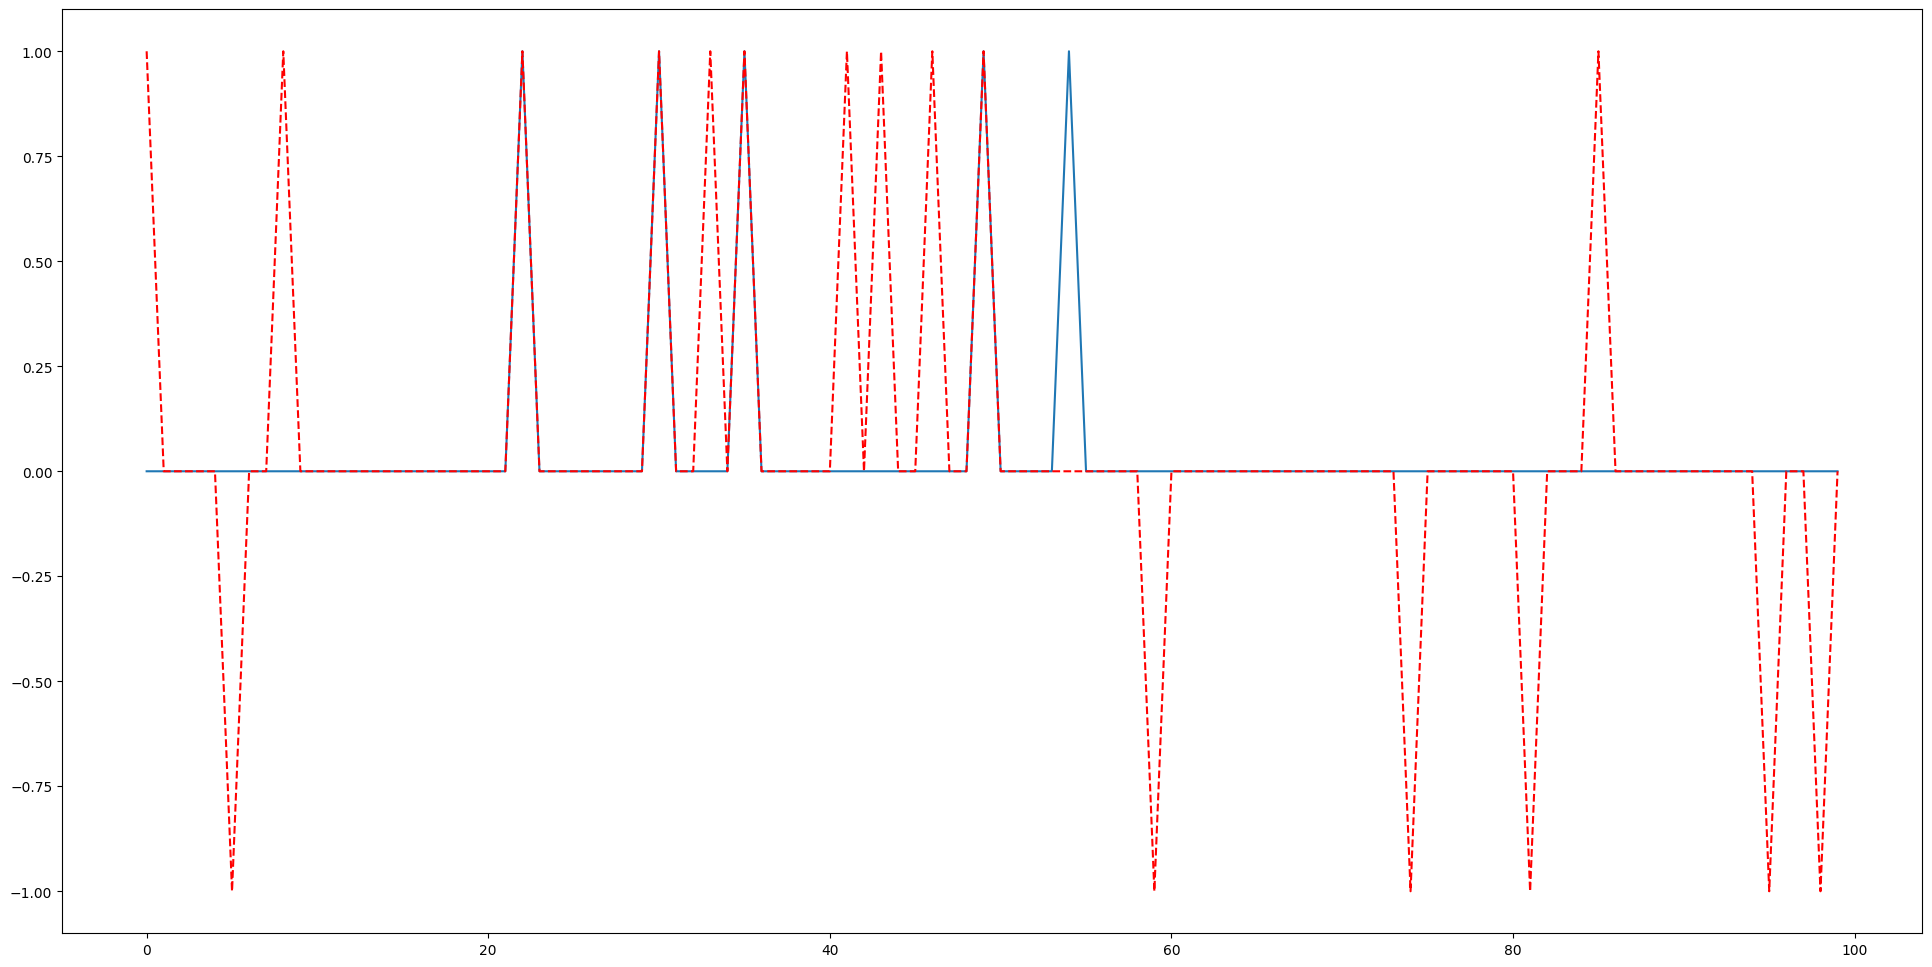

In [103]:
import matplotlib.pyplot as plt
plt.figure(figsize=(24,12))
plt.plot(cmp[-1100:-1000])
plt.plot(y_test[-1100:-1000],'r', linestyle='--' )
plt.show

In [23]:
model = keras.models.load_model("main-m15-tanh-250-(128, 0.2, 128, 0.1, 128, 1)-sgd-(0.00125)-period6_(20k).hdf5")

<function matplotlib.pyplot.show(close=None, block=None)>

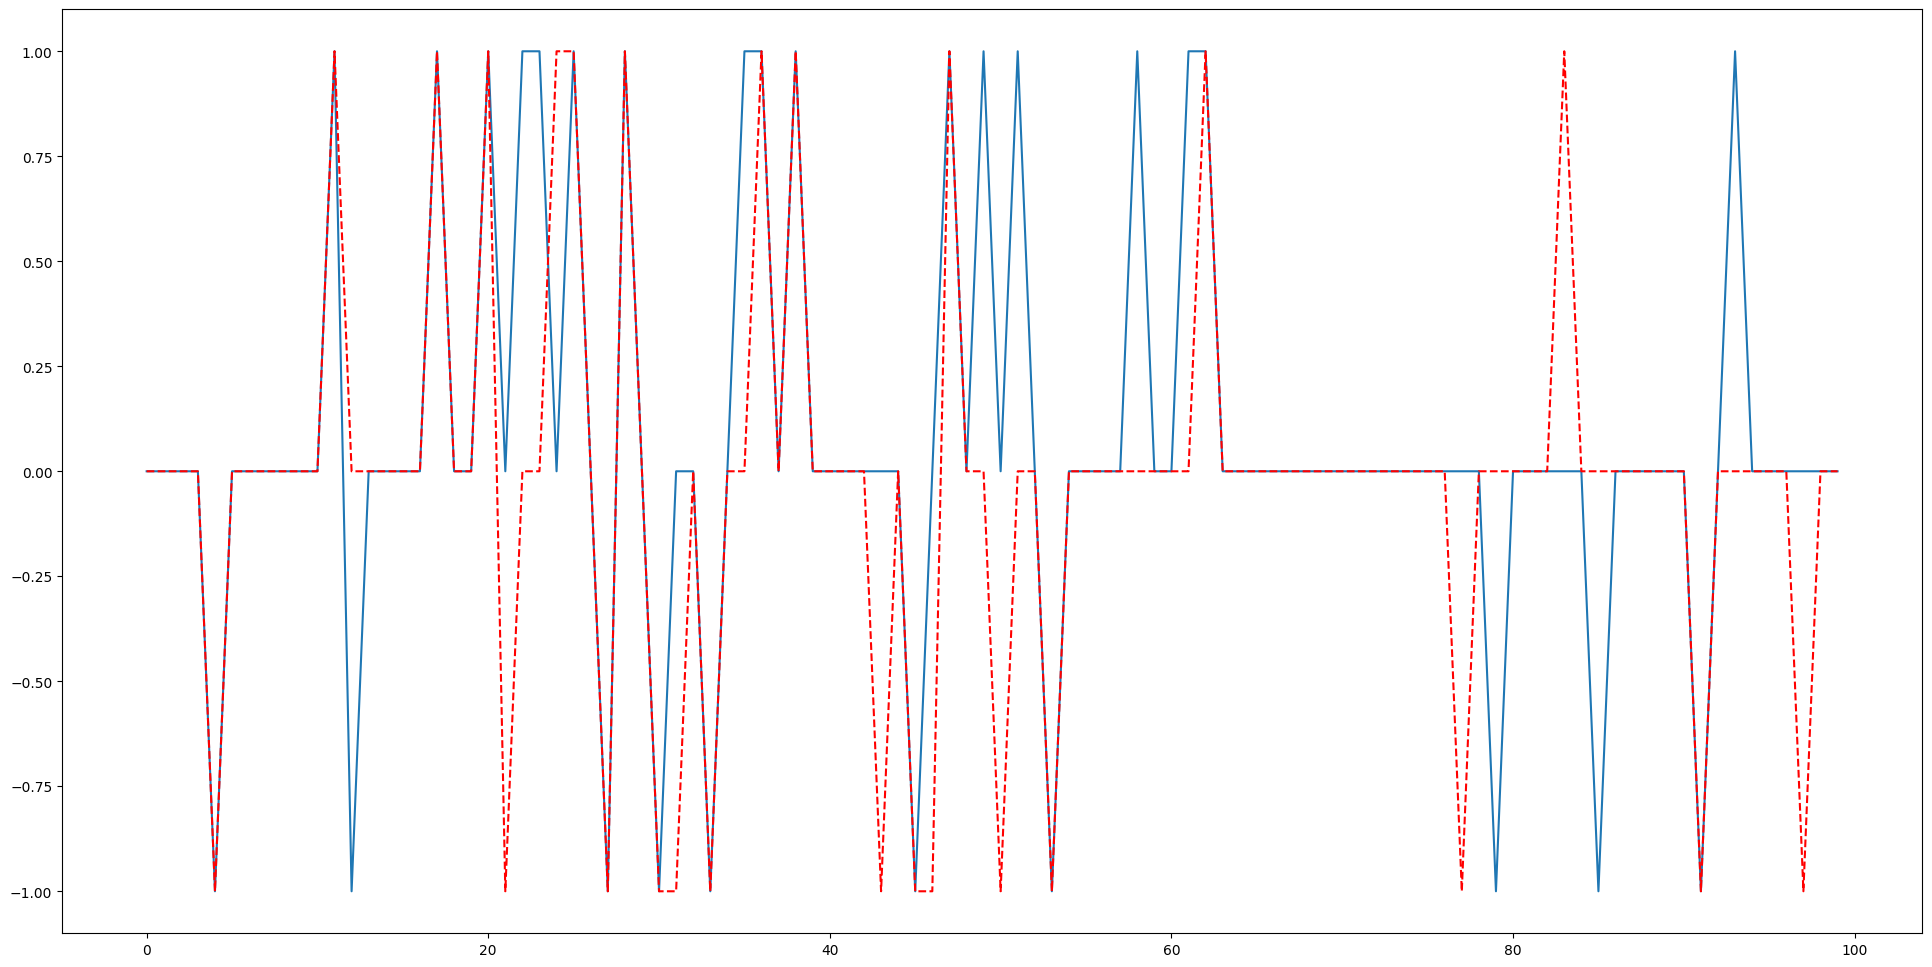

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(24,12))
plt.plot(cmp[-300:-200])
plt.plot(y_test[-300:-200],'r', linestyle='--' )
plt.show